
Sample Data:
   TV_Advertising  Radio_Advertising  SocialMedia_Advertising  \
0             124                 77                      140   
1              29                 26                       67   
2              26                 11                       60   
3             186                 78                       64   
4             298                 48                        9   

   Influencer_Advertising   Platform  Segment  Sales  
0                      63     Retail    Teens    266  
1                      20     Retail    Teens     54  
2                      57  Wholesale  Seniors    322  
3                      43     Retail   Adults    493  
4                      54  Wholesale  Seniors    284  

Model: Linear Regression
MAE: 114.18795447905504
MSE: 17669.641328110505
RMSE: 132.92720311550417
R2 Score: -0.19558511445074878

Model: Random Forest
MAE: 110.20225
MSE: 16554.589562499998
RMSE: 128.66463990739646
R2 Score: -0.12013710347810558


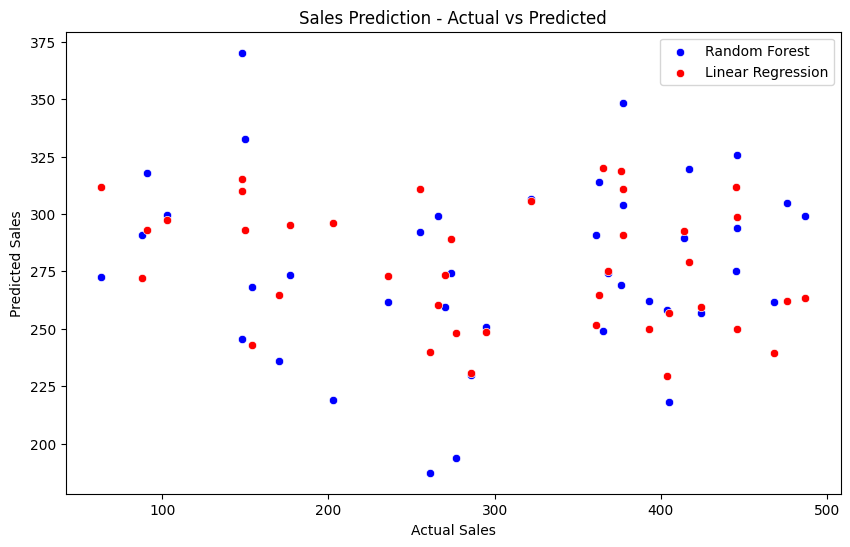


Predicted Sales: 239.93


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.DataFrame({
    'TV_Advertising': np.random.randint(10, 300, 200),
    'Radio_Advertising': np.random.randint(5, 100, 200),
    'SocialMedia_Advertising': np.random.randint(5, 150, 200),
    'Influencer_Advertising': np.random.randint(1, 80, 200),
    'Platform': np.random.choice(['Online', 'Retail', 'Wholesale'], 200),
    'Segment': np.random.choice(['Teens', 'Adults', 'Seniors'], 200),
    'Sales': np.random.randint(50, 500, 200)
})

print("\nSample Data:")
print(data.head())

data = pd.get_dummies(data, columns=['Platform','Segment'], drop_first=True)

X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_lin, color='red', label='Linear Regression')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales Prediction - Actual vs Predicted")
plt.legend()
plt.show()

# Prepare new data for prediction
new_data = pd.DataFrame({
    'TV_Advertising': [200],
    'Radio_Advertising': [50],
    'SocialMedia_Advertising': [100],
    'Influencer_Advertising': [30],
    'Platform': ['Online'], # Keep original categorical column
    'Segment': ['Adults']    # Keep original categorical column
})

# Apply one-hot encoding to new data, aligning columns with training data
new_data = pd.get_dummies(new_data, columns=['Platform','Segment'], drop_first=True)

# Ensure new_data has the same columns as X_train, adding missing ones with 0
missing_cols = set(X_train.columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0

# Ensure the order of columns is the same
new_data = new_data[X_train.columns]


predicted_sales = rf_reg.predict(new_data)
print("\nPredicted Sales:", predicted_sales[0])